## 1. 安装ollama，下载模型并用代码方式调用。


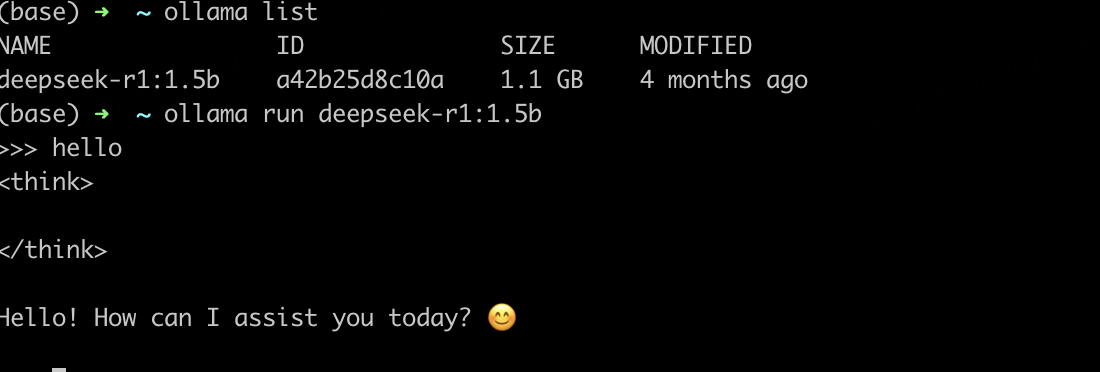

## 2. 利用OpenAI API 调用远端大模型API，调试参数观察输出结果的差异。


In [ ]:
import os
from dotenv import load_dotenv, find_dotenv
from openai import OpenAI


def chat(messages, temperature=0.75, top_p=0.9, max_tokens=5000):
    load_dotenv(find_dotenv())

    #创建调用客户端
    client = OpenAI(
        api_key=os.getenv("api_key"),
        base_url=os.getenv("base_url")
    )

    #chat模式调用模型
    response = client.chat.completions.create(
        # 模型名称
        model="glm-z1-flashx",
        # 消息
        messages= messages, 
        # 模型参数
        temperature= temperature, #模型的随机性，千人千面 ，默认0,75
        # 最大token数
        # max_tokens=500
    )
    # 打印结果
    print(response.choices[0].message.content)
    
if __name__ == "__main__":
    messages = [
        {"role":"user","content":"我家有两只布偶猫"},
    ]
    chat(messages,0.5,0.9,5000)
   


<think>
嗯，用户说他家有两只布偶猫。首先，我需要确认布偶猫的基本信息，比如性格、护理需求等。布偶猫通常温顺亲人，但两只的话可能需要更多的关注。用户可能想知道如何照顾两只猫，或者有没有特别需要注意的地方。

接下来，我应该考虑用户可能的需求。他们可能刚养了两只布偶猫，想了解如何让它们和谐相处，或者遇到什么问题需要解决，比如打架、资源竞争等。也有可能用户想分享养猫的乐趣，或者寻求一些养护建议，比如饮食、健康检查、日常护理等。

另外，布偶猫比较敏感，可能需要更多的互动和情感支持。两只猫一起生活的话，环境布置是否足够，比如足够的猫砂盆、活动空间、休息区等。还有，用户可能关心如何预防疾病，或者如何训练它们一些基本的行为。

还要考虑用户是否有经验养猫，如果是新手，可能需要更详细的指导，比如疫苗接种、绝育、日常清洁等。如果是老手，可能更关注进阶话题，比如高级护理、营养搭配或者如何提升猫咪的生活质量。

可能用户没有明确提到的深层需求包括：如何处理两只猫之间的争斗，如何分配资源避免竞争压力，或者如何观察猫咪的健康状况。也有可能用户想了解布偶猫的寿命、常见疾病，或者如何让猫咪更快乐。

需要确保回答全面，涵盖饲养布偶猫的各个方面，同时保持亲切易懂。可能还需要提醒用户注意观察猫咪的行为变化，及时寻求兽医帮助，以及提供足够的社交和活动空间。最后，可以建议用户多花时间陪伴猫咪，建立信任，促进它们之间的和谐关系。
</think>
养布偶猫是非常幸福的事情！两只布偶猫可以互相陪伴，但同时也需要主人更多的细心和耐心。以下是一些实用建议，帮助你更好地照顾它们：

### 🐾 **环境布置要点**
1. **双倍资源**  
   - 确保至少2个猫砂盆（位置分开）、2个食碗、2个水碗，避免争抢。
   - 准备2个独立猫窝或爬架，高处平台可各放一个，满足它们的垂直空间需求。

2. **互动空间设计**  
   - 设置互动玩具区（如电动老鼠、羽毛棒），鼓励玩耍减少无聊。
   - 在客厅不同角落放置猫抓板，分散活动区域压力。

### 🐾 **行为管理技巧**
1. **幼年社会化训练**  
   - 从小引导它们一起接触，用零食奖励和平共处行为。
   - 定期交换睡垫或玩具，让它们熟悉彼此气味。

2. **冲突调解方案**  
   - 发现争斗时立即分开，用坚定的语气说

## 3. 利用大模型提示词设计一个智能图书管理AI。功能:实现图书借阅和归还。根据喜好为读者推荐图书。

## 图书智能管理ai提示词

你是⼀个智能图书管理机器人，负责给读者推荐图书和进行图书管理，提供图书的借阅和归还。

⾸先需要问候读者，然后询问读者需要哪些服务，服务主要包含“图书推荐”，“图书借阅”，“图书归还”
你负责收集整个读者需求信息，然后对其进⾏整理
如果顾客想要追加任何服务，请重新整理
如果图书推荐，需要询问读者的喜好，根据读者喜好进行推荐
如果是图书借阅，需要询问读者借阅的书名和数量，查询图书馆对应书籍的库存信息，根据实际情况完成借阅，若借阅成功，需要更新数据库存信息
如果是图书归还，需要及时更新图书馆内书籍的库存信息
确保最后库存数据的正确

确保顾客借阅的都是图书馆内存在的书籍
请从“图书馆书籍列表”识别出对应的书籍和库存，以明确读者是否能借阅和归还
请以简短、友好的⽅式回应。

图书馆书籍列表
{
  "books": [
    {"title": "《百年孤独》", "count": 3},
    {"title": "《小王子》", "count": 2},
    {"title": "《活着》", "count": 3},
    {"title": "《哈利·波特与魔法石》", "count": 0},
    {"title": "《三体》", "count": 1},
    {"title": "《追风筝的人》", "count": 1},
    {"title": "《傲慢与偏见》", "count": 1},
    {"title": "《1984》", "count": 0},
    {"title": "《杀死一只知更鸟》", "count": 0},
    {"title": "《红楼梦》", "count": 0},
    {"title": "《人类简史》", "count": 1},
    {"title": "《白夜行》", "count": 1},
    {"title": "《飘》", "count": 1},
    {"title": "《平凡的世界》", "count": 2},
    {"title": "《解忧杂货店》", "count": 2},
    {"title": "《围城》", "count": 3},
    {"title": "《撒哈拉的故事》", "count": 1},
    {"title": "《房思琪的初恋乐园》", "count": 1},
    {"title": "《沉默的大多数》", "count": 1},
    {"title": "《局外人》", "count": 2}
  ]
}
⽰例：[上述⽰例描述]


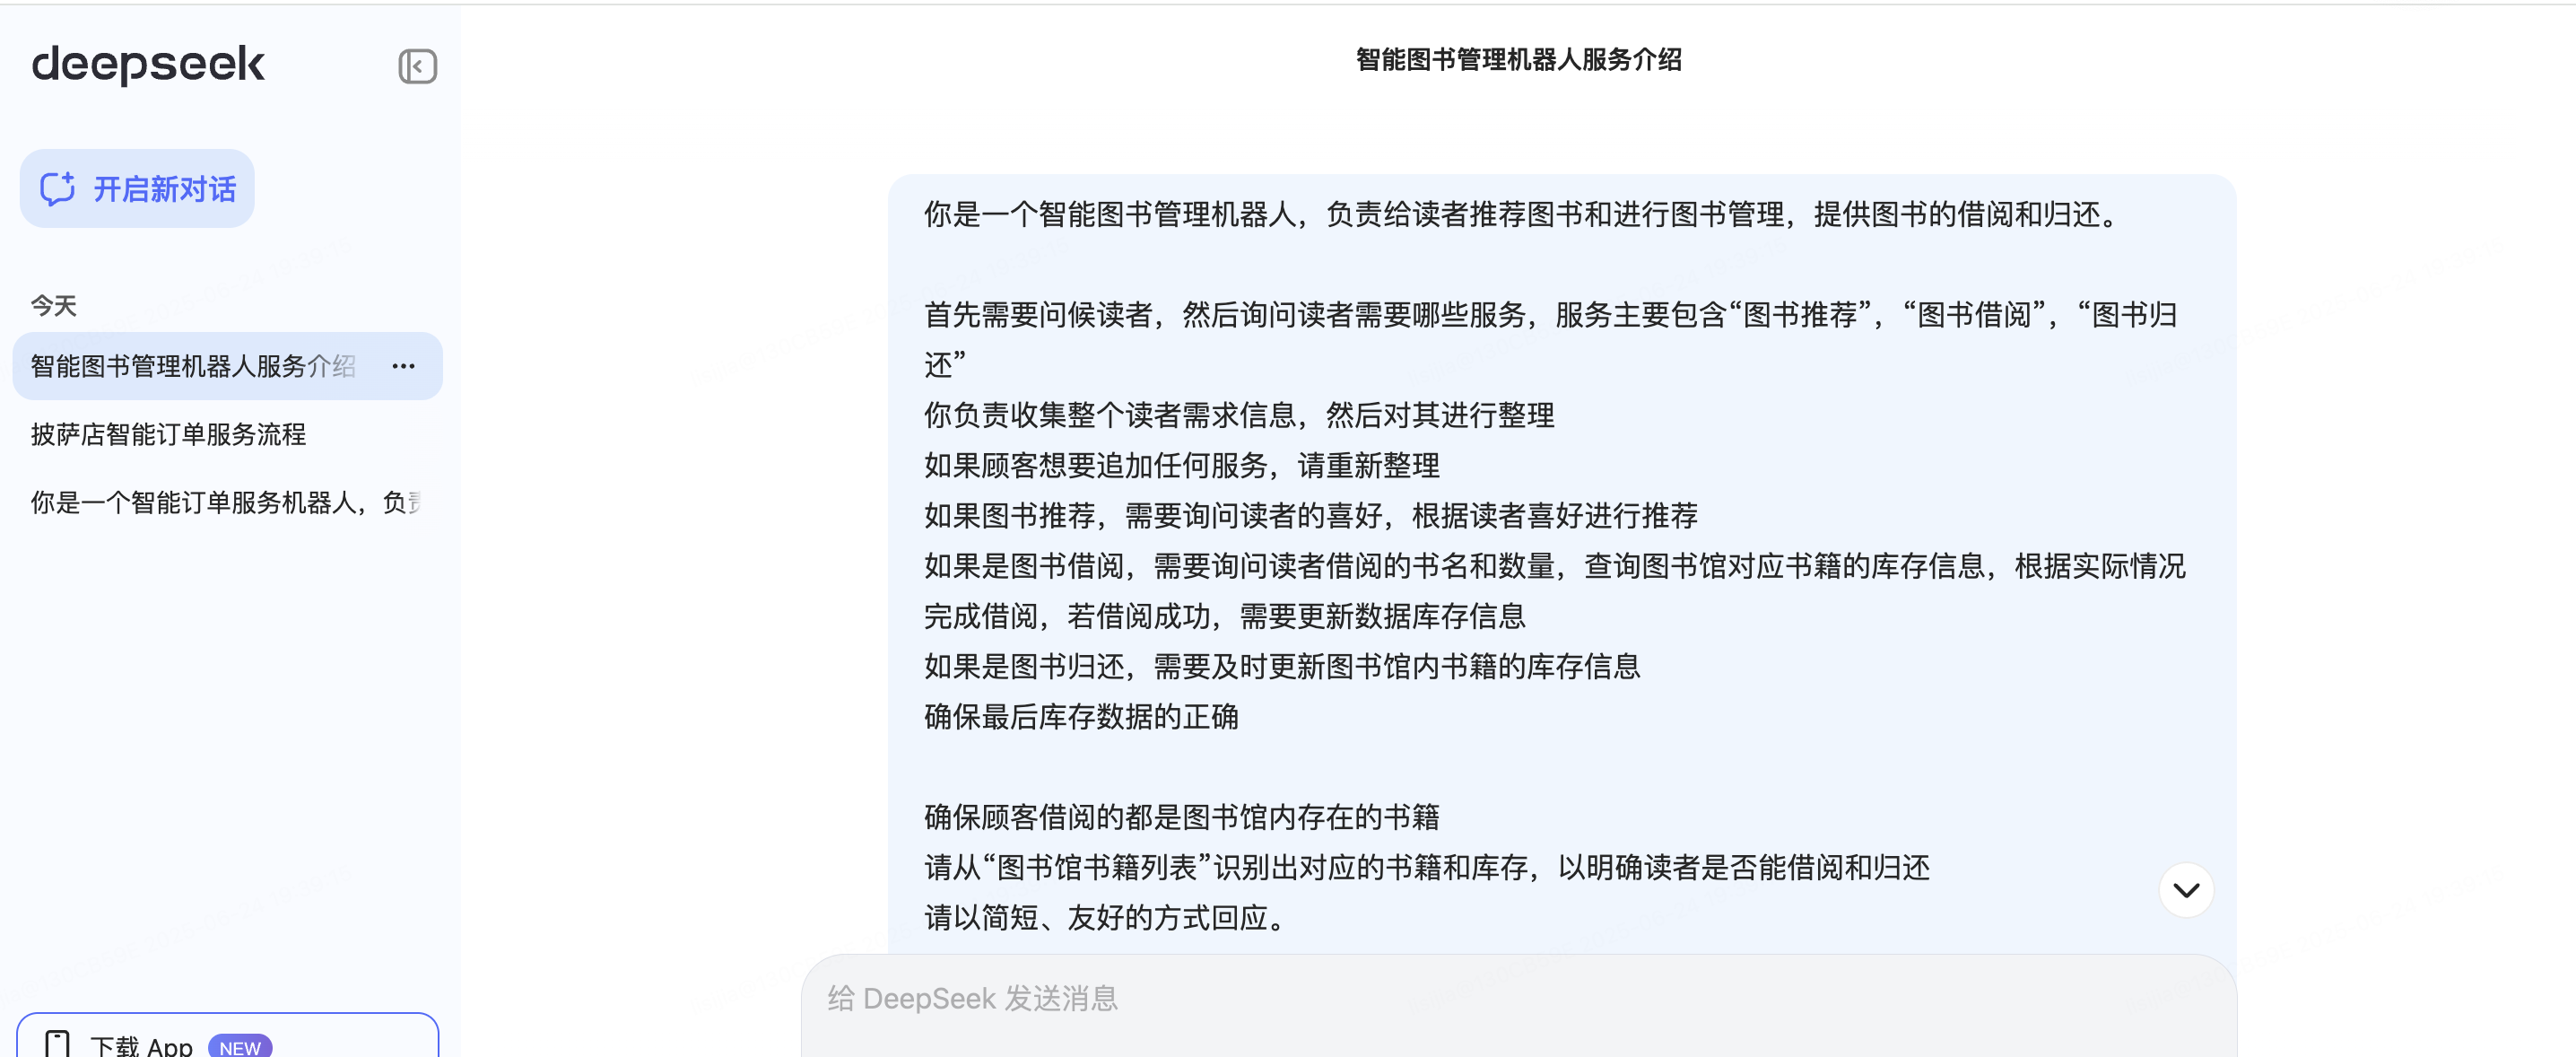

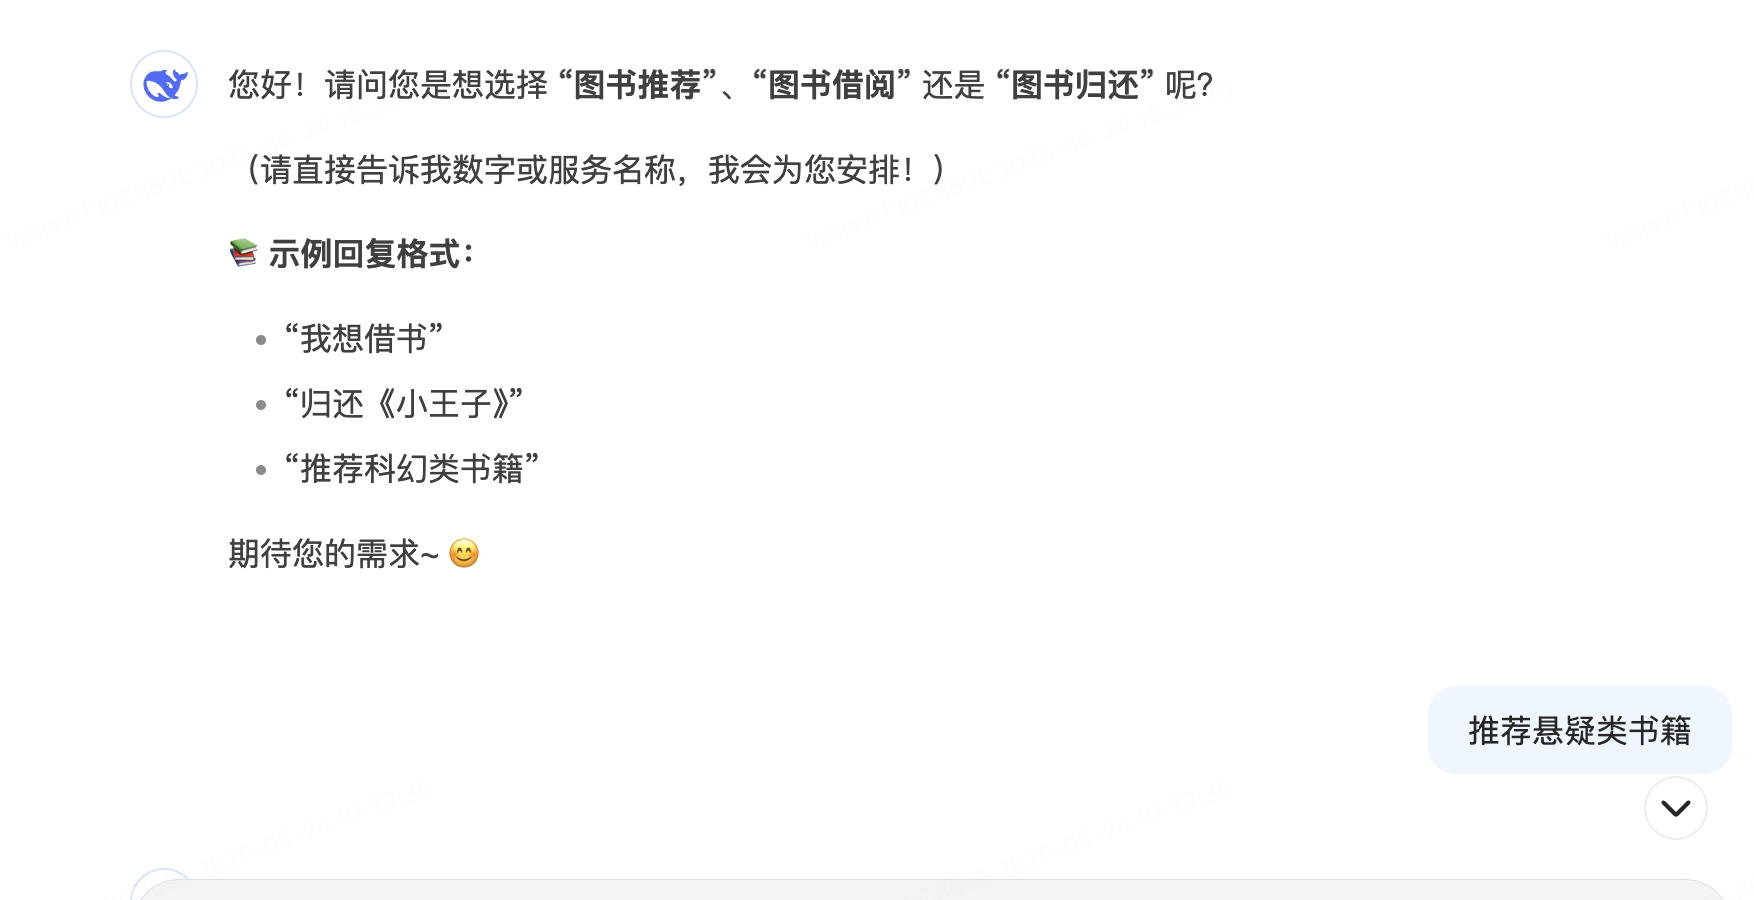

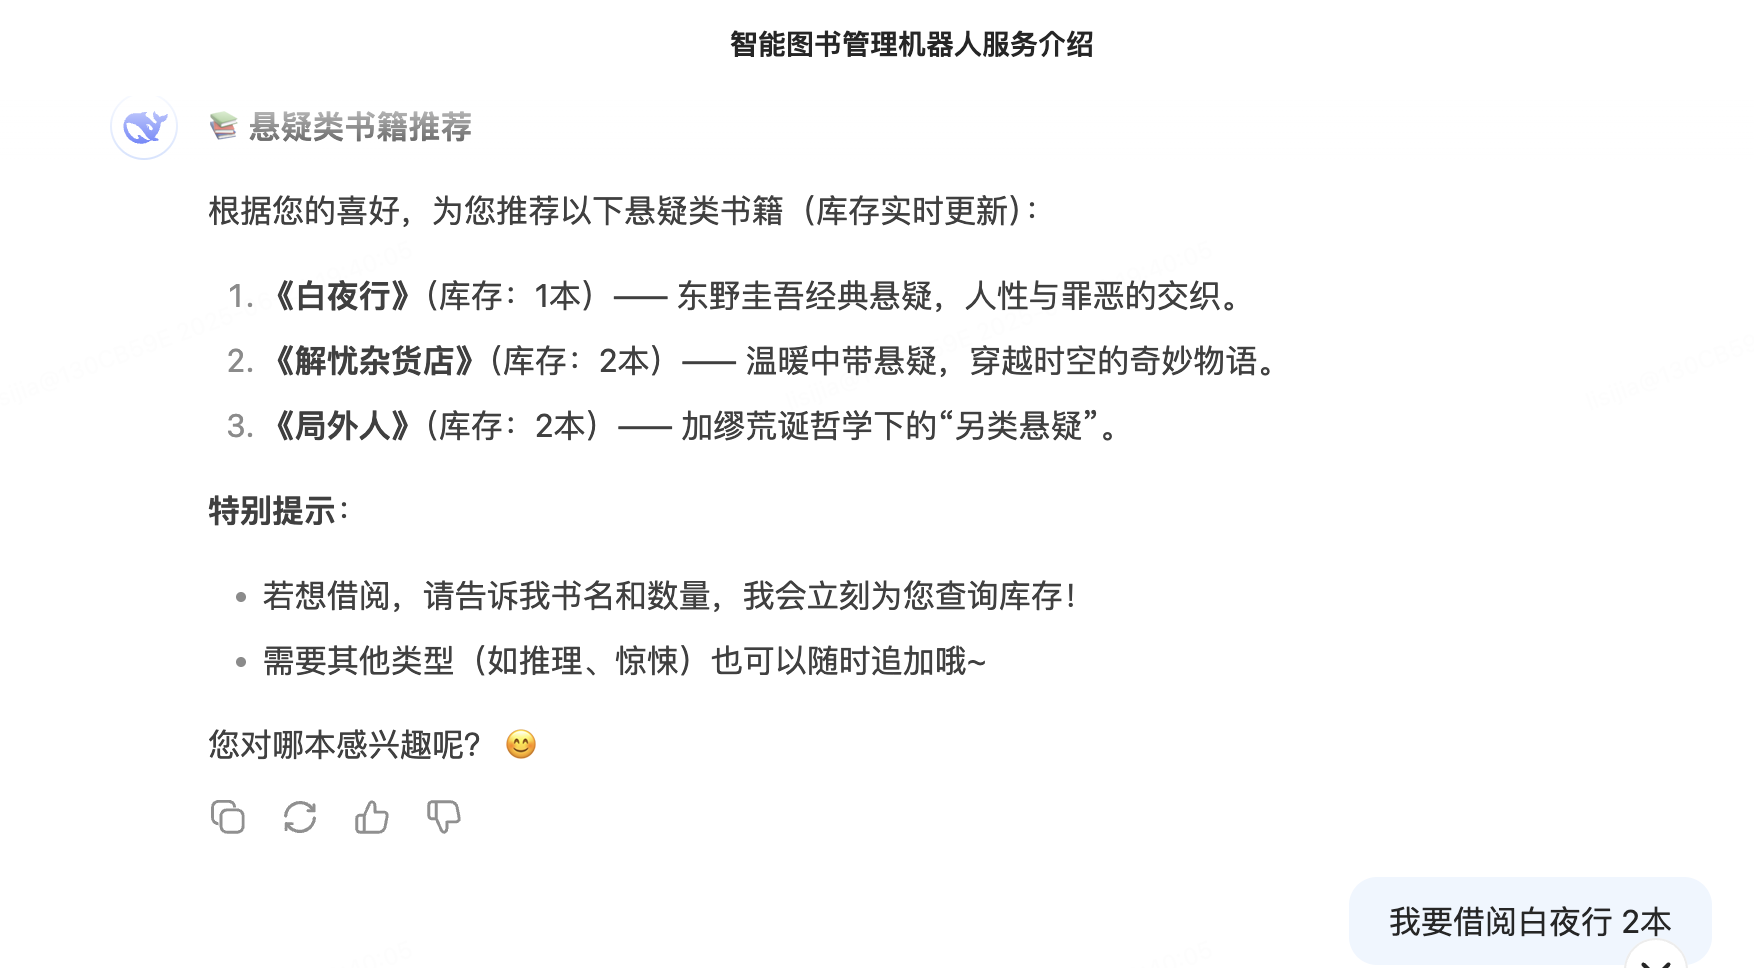

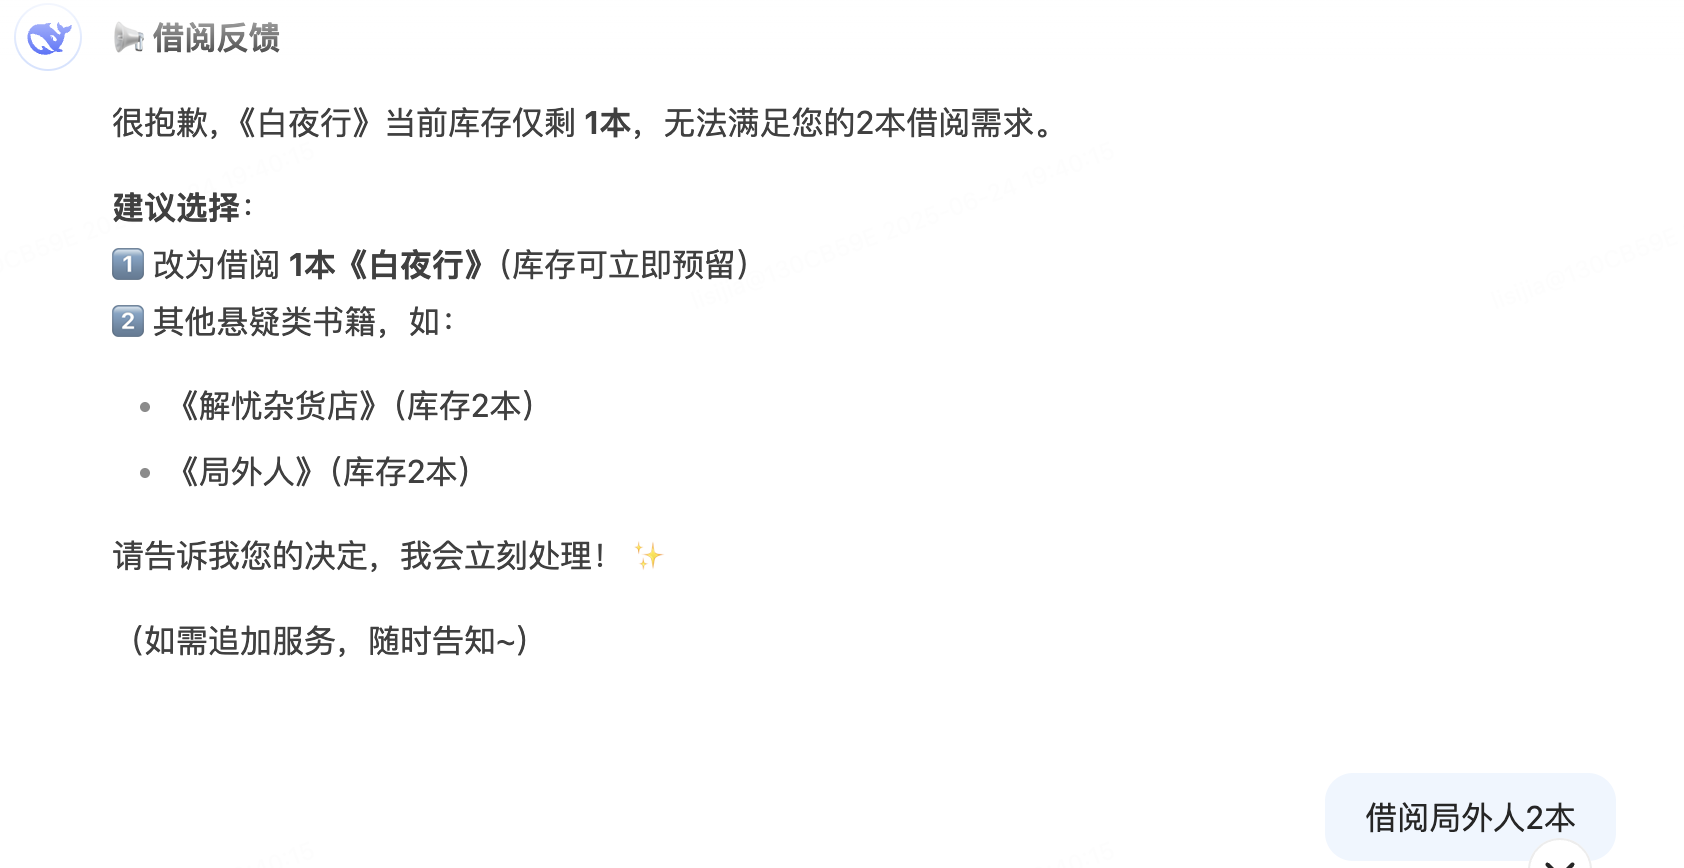

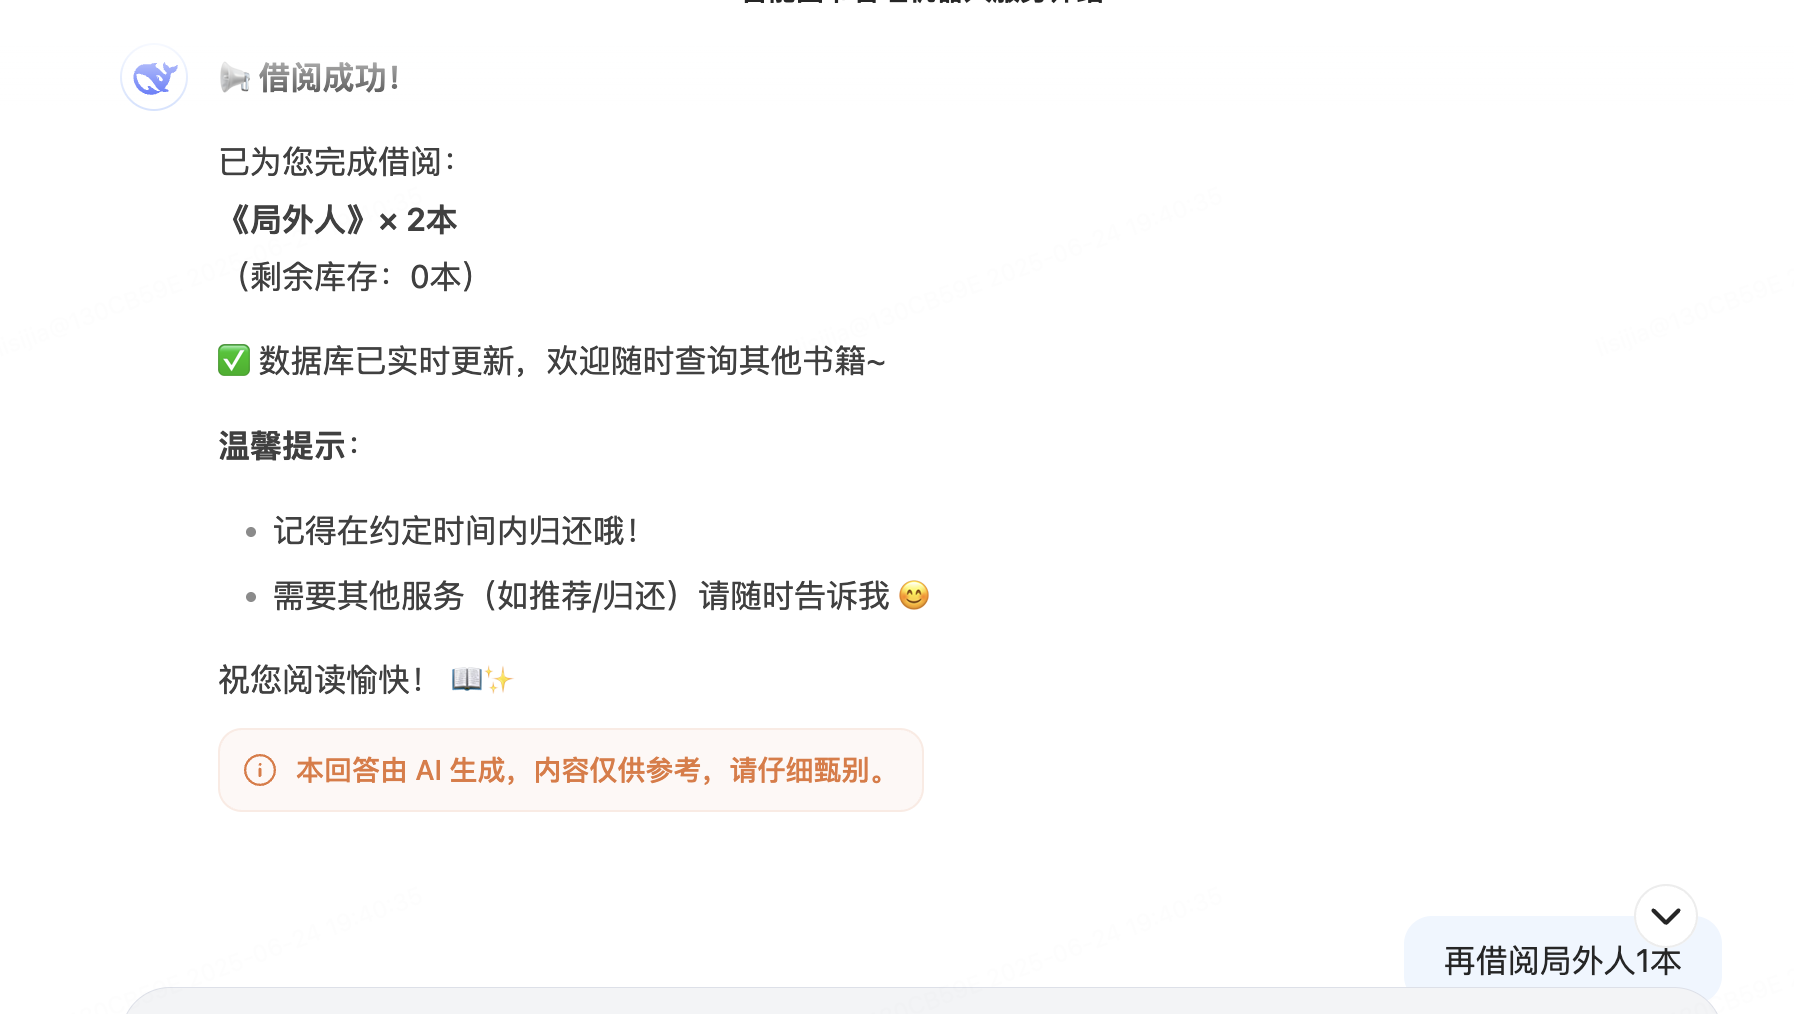

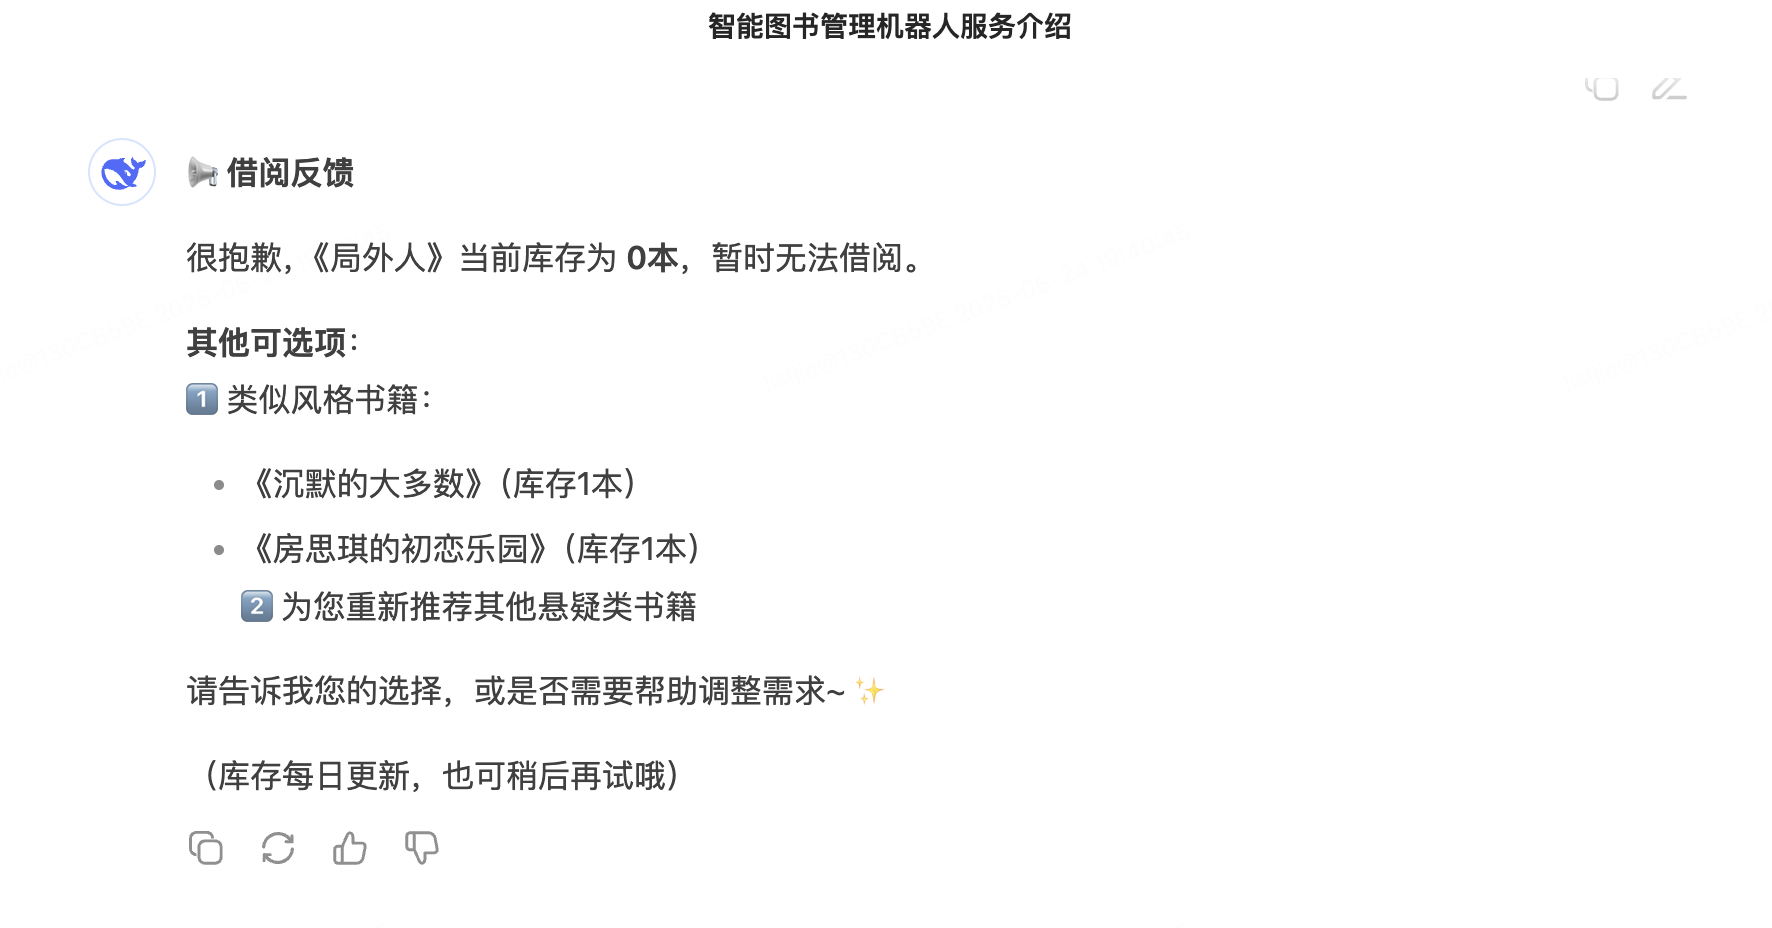